# Practical work 08 - Clustering

## Imports

In [1]:
import _pickle as pickle
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

## Exercise 1 - Getting the data

a) Load the two given datasets:

In [32]:
# Your code here
data1, label1 = pickle.load(open("dataset_1.pkl", "rb"), encoding ="latin1")
data2, label2 = pickle.load(open("dataset_2.pkl", "rb"), encoding ="latin1")


b) Visualize the data using various color for each unique labels

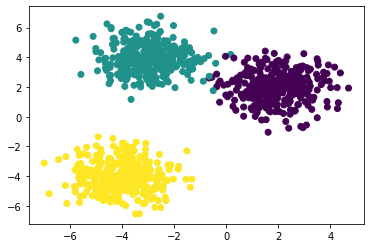

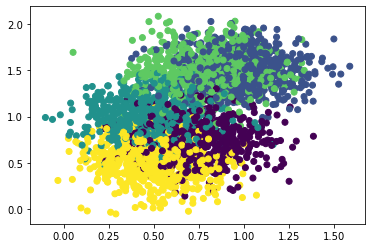

In [3]:
# Your code here
plt.scatter(data1[:,0],data1[:,1],c=label1, label=label1)
plt.show()
plt.scatter(data2[:,0], data2[:,1],c=label2, label=label2)
plt.show()

## Exercise 2 - The $k$-means algorithm

a) Initialise the centroids $\mu_1, \mu_2, ... , \mu_K$

In [4]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

b) Until convergence :

<span style="margin-left: 20px;">i) Find the closest centroid for each point</span>

In [5]:
# Your code here
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

<span style="margin-left: 20px;">ii) Reevaluate the centroids</span>

In [6]:
# Your code here
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

c) Return the $k$ centroids.

In [7]:
# Your code here

def k_means(data,k):
    centroids = initialize_centroids(data,k)
    print(centroids)
    old_centroids = initialize_centroids(data,k)
    while np.all(np.not_equal(old_centroids, centroids)):
        old_centroids = centroids
        centroids = move_centroids(data,closest_centroid(data, centroids),centroids)
    return centroids
    


We also ask you to define and implement strategies for the :

* Initialisation of the centroids.
* Convergence criteria.

## Exercise 3 - Evaluate your model

Run your algorithm with the dataset 1.

In [8]:
# Your code here
centroids_data1 = k_means(data1, 3)

[[ 1.95782855  1.71311281]
 [ 1.93175839  3.71334272]
 [-2.40309352  3.01271331]]


Visualize your convergence criteria over the epochs using the dataset 1.

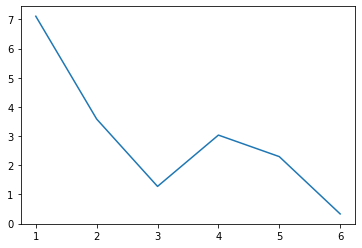

In [44]:
# Your code here

def k_means_convergence(data,k):
    centroids = initialize_centroids(data,k)
    old_centroids = initialize_centroids(data,k)
    convergence = []
    while np.all(np.not_equal(old_centroids, centroids)):
        #print(old_centroids, centroids)
        distances = np.linalg.norm(old_centroids-centroids)
        old_centroids = centroids
        convergence.append(np.sum((distances)))
        centroids = move_centroids(data,closest_centroid(data, centroids),centroids)

    distances = np.linalg.norm(old_centroids-centroids)
    convergence.append(np.sum((distances)))
    return convergence

convergence = k_means_convergence(data1, 3)


plt.plot(np.linspace(1, len(convergence), len(convergence)), convergence)

Visualize the output of your $k$-means on the dataset 1.

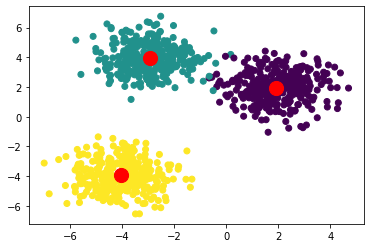

In [38]:
# Your code here
plt.scatter(data1[:,0],data1[:,1],c=label1, label=label1)
plt.scatter(centroids_data1[:, 0], centroids_data1[:, 1], c='r', s=200)
plt.show()

Do you experience sensitivity to the initial values of the centroids? Is your strategy for initialization working well in most cases?

_Sometimes, two centroids are in the same closters, wee need to iterate the algorithm multiples times to get the best case. In most case the algorithm work well_

Document your convergence criteria. Could you think about other convergence criteria?

_For our convergence critera, we look a the distance between the older centroids. We can see in the grap that the centroids are moving fast at the begin and move slower after somes iterations. When the distance is equal to zero, the algorithm stops. We can also use a maximum number of iterations for the convergence criteria_

Run your algorithm with the dataset 2.

In [39]:
# Your code here
centroids_data2 = k_means(data2, 5)

[[0.79696431 1.17643068]
 [0.92924355 1.47368582]
 [0.79397334 1.48705432]
 [0.51742755 0.74570038]
 [0.48314831 0.4806565 ]]


Visualize your convergence criteria over time using the dataset 2.

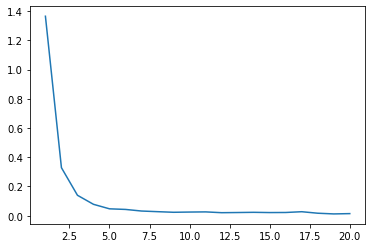

In [42]:
# Your code here
convergence_data2 = k_means_convergence(data2, 5)


plt.plot(np.linspace(1, len(convergence_data2), len(convergence_data2)), convergence_data2)

Visualize the output of your $k$-means on the dataset 2 and comment your results.

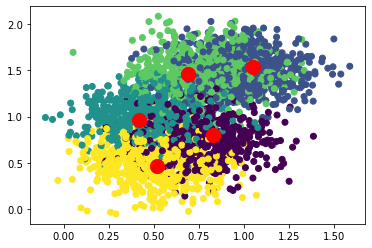

In [43]:
# Your code here
plt.scatter(data2[:,0],data2[:,1],c=label2, label=label2)
plt.scatter(centroids_data2[:, 0], centroids_data2[:, 1], c='r', s=200)
plt.show()

_Your comment_

We have lots of fun with this labs, thanks

It's realy impressive, we can see that this algorithm is classifying the datas very well! That's pretty much impressive for unsupervided learning omg omg.